# TIME SERIES - SALES FORECASTING

### NOTED THAT WE DO NOT DIVE INTO ASUMPTION AND OTHERS

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<br>
<br>
First, we import the data
<br>
<br>

In [2]:
data=pd.read_csv('timeseries.csv')
data.head()

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


<br>
<br>
We fix data columns name from unamed, into MONTH 
<br>
<br>

In [3]:
data.columns=['Month', 'Sales', 'AdBudget', 'GDP']
data.head()

,Month,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


<br>
<br>
Next, we clean MONTH to has datetime type and also we corect its format.
<br>
<br>

In [4]:
f="%b-%y"
data['Month']=data['Month'].apply(lambda x:datetime.strptime(x,f))
data.head()

,Month,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


<br>
<br>
We only want to forecast SALES. For time series, time variable has to be sorted and has no missing values. Also it should not has duplicate values.
<br>
<br>

In [5]:
time=data[['Month','Sales']]
time['Month']=time['Month'].sort_values()
time.head()

,Month,Sales
0,1981-03-01,1020.2
1,1981-06-01,889.2
2,1981-09-01,795.0
3,1981-12-01,1003.9
4,1982-03-01,1057.7


In [6]:
time=time.set_index('Month')
time.head()

,Sales
Month,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


<br>
<br>
To be able to plot time series, we have asumptions. First, is stationarity, Data must has 'constant' mean and variance. 
<br>
<br>

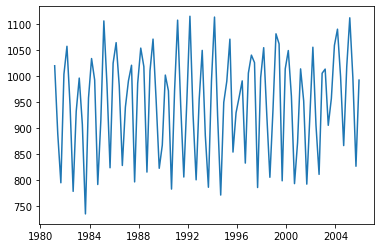

In [7]:
plt.plot(time)

<br>
<br>
Here we see that data kinda already stationer. TO make sure, we use rolling and Dickey Fuller Test with null hipotesis of non stationerity data to check the stationerity of data
<br>
<br>

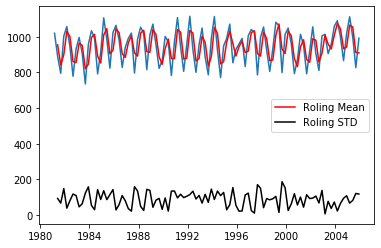

In [8]:
rolmean=time.rolling(window=2).mean()
rolstd=time.rolling(window=2).std()
plt.plot(time)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

In [9]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')
dftest=adfuller(time['Sales'],autolag='AIC')
print(dftest)
dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-3.262754669629837, 0.01662767680742967, 9, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, 948.7997166922157)


Test Stat             -3.262755
p-value                0.016628
lag_used               9.000000
number of obs used    90.000000
dtype: float64

<br>
<br>
We see that rolling mean and std still fluctual but they kinda form 'constant line'. From Dickey Fuller statistic we see that its p-value has less than 5% significance, so we reject H0 and we can accept that data is stationer. But we are not statisfied yet. WE want to see if transformation to logarithm or differencing will have significance difference or not. 
<br>
<br>

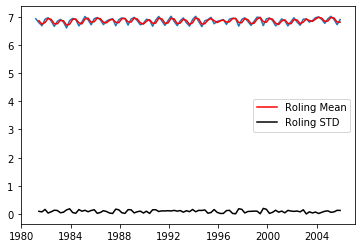

In [10]:
time2=np.log(time)
rolmean=time2.rolling(window=2).mean()
rolstd=time2.rolling(window=2).std()
plt.plot(time2)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

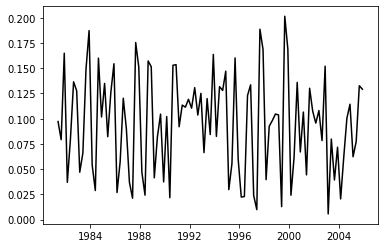

In [11]:
plt.plot(rolstd,color='black',label='Roling STD')

In [12]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')

dftest=adfuller(time2['Sales'],autolag='AIC')
print(dftest)
dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-2.944118949131902, 0.04045286701282854, 8, 91, {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}, -245.55724043193783)


Test Stat             -2.944119
p-value                0.040453
lag_used               8.000000
number of obs used    91.000000
dtype: float64

<br>
<br>
At first, data looks like already has stationerity. But if we zoom in moving average standar deviation, it's still fluctuate. <br>
Also even if p-value less than 0.05, it is bigger than using original data. But we still consider transformation and will check which data our timeseries model work best 
<br>
<br>
Next we see if differencing data will has improvement or not.
<br>
<br>

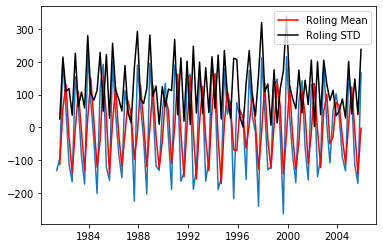

In [13]:
from statsmodels.tsa.stattools import adfuller
diff=time['Sales']-time['Sales'].shift()
diff=diff.dropna()

rolmean=diff.rolling(window=2).mean()
rolstd=diff.rolling(window=2).std()
plt.plot(diff)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

In [14]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')

dftest=adfuller(diff,autolag='AIC')
print(dftest)
dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-5.1002874505017735, 1.4000349196885598e-05, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 944.5888434419946)


Test Stat             -5.100287
p-value                0.000014
lag_used              10.000000
number of obs used    88.000000
dtype: float64

<br>
<br>
WE see from rolling and hypotesis test that using differencing one or d=1 we has more stationer data. BEcause of this, we want to see which data from these 3 data (original, logarithm, differencing) that work best
<br>
<br>
Below, we see trend,seasonal,residual from differencing data. Data looks like has seasons, and so far below we will try to analyze it using SARIMA model, which is ARIMA but with season
<br>

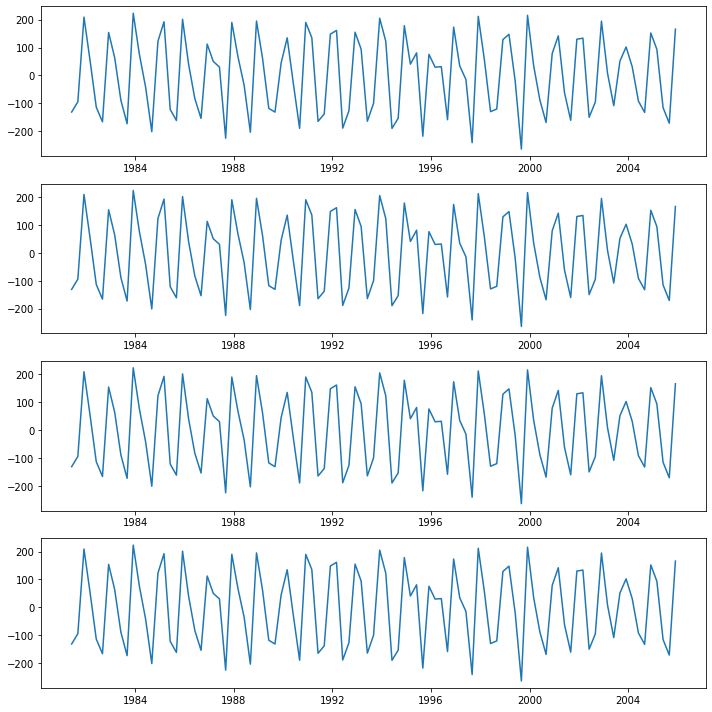

In [15]:

f=plt.figure(figsize=(10,10))

f.add_subplot(4,1,1)
plt.plot(diff)
f.add_subplot(4,1,2)
plt.plot(diff)
f.add_subplot(4,1,3)
plt.plot(diff)
f.add_subplot(4,1,4)
plt.plot(diff)

plt.tight_layout()



<br>
<br>
We want to see which ARMA(p,q) for our timeseries model. We can see it from acf (autocorrelation) and pacf (partial autocorelation) plot. If there is cut downs in pacf but tails off in acf, we use AR(P). If reverse, we use MA(q). If both plot tails off, we use ARMA. 
<br>
<br>

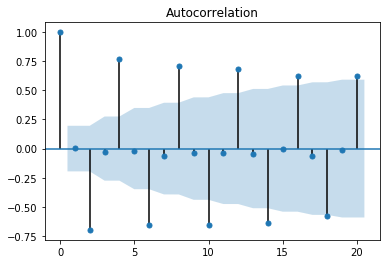

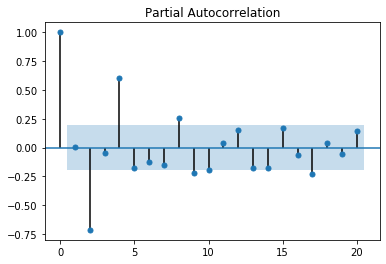

In [16]:
import statsmodels.graphics.tsaplots as sts
sts.plot_acf(time,lags=20)
sts.plot_pacf(time,lags=20)
plt.show()


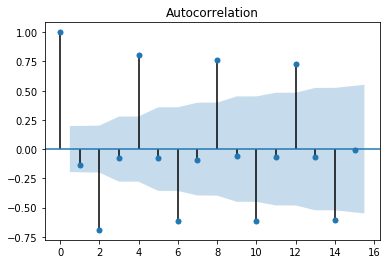

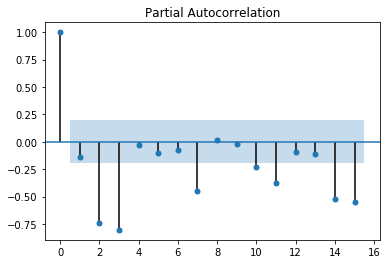

In [17]:
import statsmodels.graphics.tsaplots as sts
sts.plot_acf(diff,lags=15)
sts.plot_pacf(diff,lags=15)
plt.show()


<br>
<br>
Above plot is for original data (logarithm data's ACF and PACF is similiar) and for differencing data. We see that from these plots, our ARIMA model is still unclear. But we see that there are <b>Pattern</b> in ACF, indicating there is seasonality. To find which arma model work best for our data we use looping on these 3 data (notes that for diff because we already differencing d=0 when building for this data). 
<br>
<br>

## ARIMA MODEL 

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

Result=pd.DataFrame(columns=['Model','RMSE','MAE'])

for i in range(0,6):
    for j in range(0,6):
        if (i,j) not in [(1,8),(2,2),(2,3),(2,6),(3,2),(3,3),(3,6),(4,4),(4,5),(5,3),(5,4),(5,5)]:
            models=[i,0,j]
            model=ARIMA(time,order=models)
            result_ARIMA=model.fit(disp=1)
            predict=result_ARIMA.fittedvalues
            RMSE = mean_squared_error(time,predict)
            MAE = mean_absolute_error(time,predict)
            a=pd.DataFrame(columns=['Model','RMSE','MAE'])
            a['Model']=[models]
            a['RMSE']=[RMSE]
            a['MAE']=[MAE]
            Result=Result.append(a,ignore_index=True)
Result.sort_values('MAE').head()

,Model,RMSE,MAE
23,"[4, 0, 3]",2311.977865,38.165214
26,"[5, 0, 2]",2587.971784,41.464126
22,"[4, 0, 2]",2599.430047,41.509044
15,"[2, 0, 5]",2615.570376,41.871462
14,"[2, 0, 4]",2618.529948,41.888274


In [19]:
Result=pd.DataFrame(columns=['Model','RMSE','MAE'])

for i in range(0,6):
    for j in range(0,6):
        if (i,j) not in [(7,7),(3,3),(3,5),(4,4),(4,5),(5,4),(5,5)]:
            models=[i,0,j]
            model=ARIMA(time2,order=models)
            result_ARIMA=model.fit(disp=1)
            predict=result_ARIMA.fittedvalues
            RMSE = mean_squared_error(np.exp(time2),np.exp(predict))  #So we can compare model validation
            MAE = mean_absolute_error(np.exp(time2),np.exp(predict))
            a=pd.DataFrame(columns=['Model','RMSE','MAE'])
            a['Model']=[models]
            a['RMSE']=[RMSE]
            a['MAE']=[MAE]
            Result=Result.append(a,ignore_index=True)
Result.sort_values('MAE').head()

,Model,RMSE,MAE
25,"[4, 0, 3]",2383.901439,39.202309
28,"[5, 0, 2]",2661.876878,41.779165
24,"[4, 0, 2]",2694.303991,41.790992
29,"[5, 0, 3]",2781.209821,42.132869
16,"[2, 0, 4]",2737.502552,42.434681


In [20]:
Result=pd.DataFrame(columns=['Model','RMSE','MAE'])

for i in range(0,6):
    for j in range(0,6):
        if (i,j) not in [(0,3),(0,4),(0,5),(1,5),(2,5),(3,4),(3,5),(4,4)]:
            models=[i,0,j]
            model=ARIMA(diff,order=models)
            result_ARIMA=model.fit(disp=1)
            predict=result_ARIMA.fittedvalues
            RMSE = mean_squared_error(diff,predict)  #because d=1, there is no prediction on first obs in time 
            MAE = mean_absolute_error(diff,predict)
            a=pd.DataFrame(columns=['Model','RMSE','MAE'])
            a['Model']=[models]
            a['RMSE']=[RMSE]
            a['MAE']=[MAE]
            Result=Result.append(a,ignore_index=True)
Result.sort_values('MAE').head()

,Model,RMSE,MAE
27,"[5, 0, 5]",2801.673584,42.721691
21,"[4, 0, 5]",3147.092553,42.800149
20,"[4, 0, 3]",2812.918756,42.956384
26,"[5, 0, 4]",2866.767757,43.072394
25,"[5, 0, 3]",2808.989366,43.093980


<br>
<br>
We find that Best Model is using ARIMA(4,0,3) without transformation data. 
<br>


In [21]:
models=[4,0,3]
model=ARIMA(time,order=models)
result_ARIMA=model.fit(disp=1)
predict=result_ARIMA.fittedvalues
print('MSE :',mean_squared_error(time,predict))
print('MAE :',mean_absolute_error(time,predict))
print('MAPE :',np.mean(np.abs((time['Sales'] - predict) / predict)) * 100)

MSE : 2311.9778646694485
MAE : 38.1652142698875
MAPE : 4.024991518452506


In [22]:
check=pd.DataFrame()
check['Real']=time['Sales']
check['arima(4,0,3)']=predict

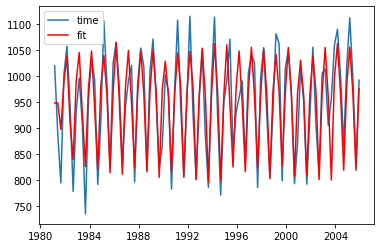

In [23]:
plt.plot(time)
plt.plot(predict,color='red')
plt.legend(['time','fit'],loc='best')
plt.show()

<br>
<br>
We see plot above that our model could fit to real data. As time series is for we to forecasting (and consider confidence intervals) and to get its pattern, estimated values and then get business insight and decision from it, our model is enough. 
<br>
NExt, we try to search which SARIMA models work best for our data. WE use SARIMA because there are seasonality in our data, which can be seen from seasonality plot and ACF PACF. We use looping and 'Estimating' seasonality order which in this case we use Seasons every 2 month (which in ACF, seasonality every 2 lag) and differencing 0.

### SARIMA MODEL

In [24]:
import statsmodels.tsa.statespace.sarimax as sr

In [25]:
for i in range(5,6):
    for j in range(0,6):
        if (i,j) not in [(0,1),(1,2),(2,4),(2,5),(4,2),(4,3),(5,3),(5,4)]:
            print(i,j)
            orde=[i,0,j,2]
            sarima=sr.SARIMAX(endog=time,order=(4,0,3),seasonal_order=(i,0,j,4))
            result_SARIMA=sarima.fit(disp=1)
            predict=result_SARIMA.fittedvalues
            MSE = mean_squared_error(time['Sales'][1:],predict[1:]) 
            MAE = mean_absolute_error(time['Sales'][1:],predict[1:])
            a=pd.DataFrame(columns=['Model','RMSE','MAE'])
            a['Model']=[orde]
            a['RMSE']=[RMSE]
            a['MAE']=[MAE]
            Result=Result.append(a,ignore_index=True)
Result.sort_values('MAE').head()

5 0
5 1
5 2
5 5


,Model,RMSE,MAE
29,"[5, 0, 1, 2]",2801.673584,39.450092
30,"[5, 0, 2, 2]",2801.673584,39.751239
31,"[5, 0, 5, 2]",2801.673584,40.246671
28,"[5, 0, 0, 2]",2801.673584,42.332486
27,"[5, 0, 5]",2801.673584,42.721691


<br>
<br>
Base on this data, we see that SARIMA is worse than ARMA(4,3). So we use ARIMA instead.Next we want to see our model's precision by spliting our data to train and test
<br>
<br>

### TIME SERIES validation 

<br>
<br>
<b>OPTIONAL</b>
<br>
We split train test to validate our ARIMA(4,0,3) model to avoid overfitting in validation
<br>


In [26]:
train=time.iloc[:80]
test=time.iloc[80:]

In [32]:
from statsmodels.tsa.arima_model import ARIMA
models=[4,0,3]
model=ARIMA(train,order=models)
result_ARIMA=model.fit(disp=1)

predict=result_ARIMA.forecast(steps=20)[0]

In [36]:
RMSE = mean_squared_error(test,predict) 
MAE = mean_absolute_error(test,predict)
a=pd.DataFrame(columns=['Model','RMSE','MAE'])
a['Model']=[models]
a['RMSE']=[RMSE]
a['MAE']=[MAE]
a['MAPE']=np.mean(np.abs((test['Sales'] - predict) / predict)) * 100
a

,Model,RMSE,MAE,MAPE
0,"[4, 0, 3]",3955.956741,49.633816,5.374362


<br>
Using train test we get worse result compared to when we use original data caused of overfitting when validating model. But it's still acceptable as we can stil capture the properties of pattern in our data
<br>


### TIME SERIES FORECASTING  2006-03-01 --> 2006-06-01 --> 2006-09-01

<br>
WE forecast year 2006 using ARIMA(4,0,3)

In [29]:
from statsmodels.tsa.arima_model import ARIMA
models=[4,0,3]
model=ARIMA(time,order=models)
result_ARIMA=model.fit(disp=1)

<br>
If WE tried to forecast the next 120 observation from our model. We has plot below. 

<Figure size 1440x720 with 0 Axes>

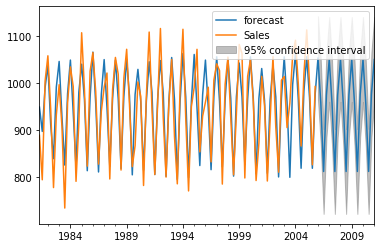

In [30]:
plt.figure(figsize=(20,10))
result_ARIMA.plot_predict(1,120)
x=result_ARIMA.forecast(steps=3)

<br>
<br>
Other than that, the result of our forecasting can be seen below. Std error is standard error and confidence intervals is intervals where the real value is 95% change between these intervals

In [31]:
pd.DataFrame(x,columns=['2006-03-01','2006-06-01','2006-09-01'],index=['Predict','Std error','Confidence Int']).transpose()

,Predict,Std error,Confidence Int
2006-03-01,1053.25,45.0167,"[965.0170225941429, 1141.4790707661473]"
2006-06-01,958.027,45.8055,"[868.2495076041047, 1047.8036817927132]"
2006-09-01,796.208,45.8189,"[706.4042701714211, 886.0110618436224]"


# CREATED BY

## ANDREAS MULYARHARDJA